In [1]:
import pandas as pd
df = pd.read_csv('amazon.csv')

In [2]:
df.drop(['product_id','product_name','user_id','user_name','review_id','review_title'], axis=1, inplace=True)
df.drop(['review_content','img_link','product_link','about_product'], axis=1, inplace=True)

In [3]:
df.shape


(1465, 6)

In [4]:
null_empty_count = df.isna().sum() + (df == "").sum()
print(null_empty_count)


category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
Sales                  2
dtype: int64


In [5]:
# Extract the text before the first pipe (|) from category column
df['type'] = df['category'].str.split('|').str[0]

In [6]:
# View the results
df.sample(5)

,category,discounted_price,actual_price,discount_percentage,rating,Sales,type
896,Electronics|Mobiles&Accessories|MobileAccessor...,"₹2,025","₹5,999",66%,4.2,"6,233",Electronics
556,Electronics|Mobiles&Accessories|MobileAccessor...,₹699,"₹1,199",42%,4.0,"14,404",Electronics
279,"Electronics|HomeTheater,TV&Video|Accessories|R...",₹299,₹599,50%,3.7,708,Electronics
1358,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,₹688,₹747,8%,4.5,"2,280",Home&Kitchen
1363,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...","₹1,090","₹2,999",64%,3.5,57,Home&Kitchen


In [7]:
# Check unique types and their counts
df['type'].value_counts()

type
Electronics              526
Computers&Accessories    453
Home&Kitchen             448
OfficeProducts            31
MusicalInstruments         2
HomeImprovement            2
Toys&Games                 1
Car&Motorbike              1
Health&PersonalCare        1
Name: count, dtype: int64

In [8]:
# Remove rows where type is 'x', 'y', or 'z' -- those whose sales are less than 5
df = df[~df['type'].isin(['Toys&Games', 'Car&Motorbike', 'Health&PersonalCare','MusicalInstruments','HomeImprovement'])]
df.shape

(1458, 7)

In [9]:
# Convert Sales to numeric (remove commas and convert to integer)
# First, fill NaN values with 0 or drop them
df['Sales'] = df['Sales'].fillna('0')  # Replace NaN with '0'
df['Sales'] = df['Sales'].str.replace(',', '').astype(int)

In [10]:
# Sum total sales (rating_count) for each type
df.groupby('type')['Sales'].sum().sort_values(ascending=False)

type
Electronics              15778848
Computers&Accessories     7728689
Home&Kitchen              2991069
OfficeProducts             149675
Name: Sales, dtype: int64

In [11]:
df.drop(['category'], axis=1, inplace=True)


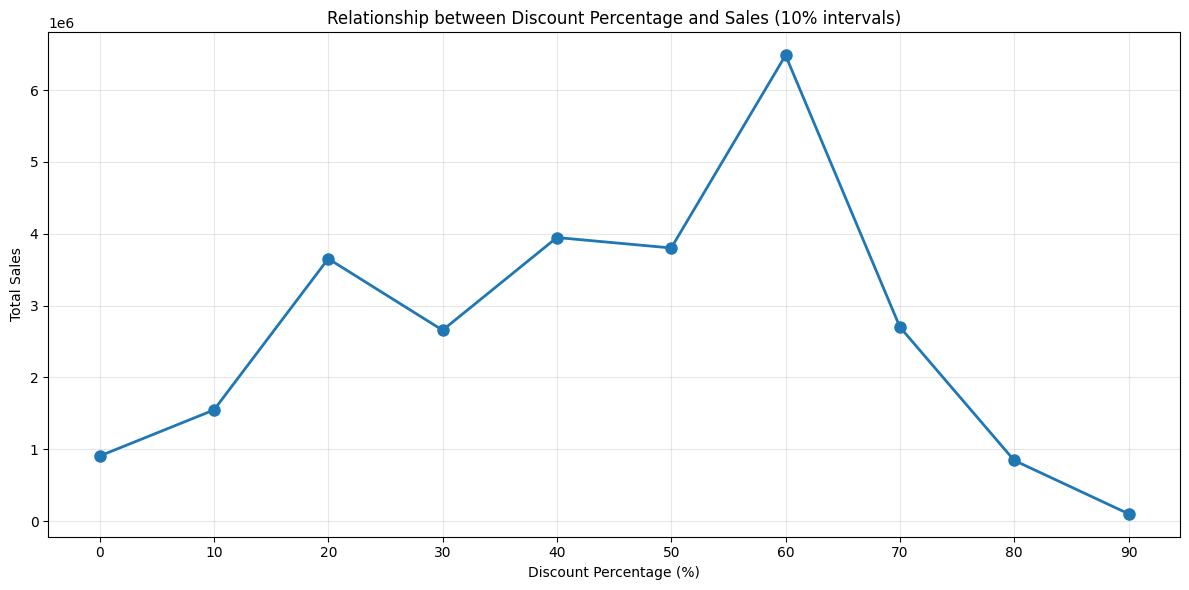

In [12]:
import matplotlib.pyplot as plt

# Create bins for discount percentage in 10% intervals
# First remove '%' symbol and convert to int
df['discount_bin'] = (df['discount_percentage'].str.replace('%', '').astype(int) // 10) * 10

# Group by discount bins and sum the sales
discount_sales = df.groupby('discount_bin')['Sales'].sum().sort_index()

# Create line graph
plt.figure(figsize=(12, 6))
plt.plot(discount_sales.index, discount_sales.values, marker='o', linewidth=2, markersize=8)
plt.xlabel('Discount Percentage (%)')
plt.ylabel('Total Sales')
plt.title('Relationship between Discount Percentage and Sales (10% intervals)')
plt.xticks(discount_sales.index)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [13]:
# Convert rating to numeric first
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Calculate mean rating for each type
df.groupby('type')['rating'].mean().sort_values(ascending=False)

type
OfficeProducts           4.309677
Computers&Accessories    4.154967
Electronics              4.081749
Home&Kitchen             4.040716
Name: rating, dtype: float64

In [14]:
# Convert actual_price to numeric (remove ₹ symbol and commas)

df['actual_price_numeric'] = df['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)

# Check the range of actual_price

print(f"Minimum actual_price: ₹{df['actual_price_numeric'].min():,.2f}")
print(f"Maximum actual_price: ₹{df['actual_price_numeric'].max():,.2f}")
print(f"Range: ₹{df['actual_price_numeric'].max() - df['actual_price_numeric'].min():,.2f}")

Minimum actual_price: ₹39.00
Maximum actual_price: ₹139,900.00
Range: ₹139,861.00


C:\Users\adity\AppData\Local\Temp\ipykernel_14404\3687902768.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_discount = df.groupby('price_range')['discount_percentage'].apply(lambda x: x.str.replace('%', '').astype(float).mean())


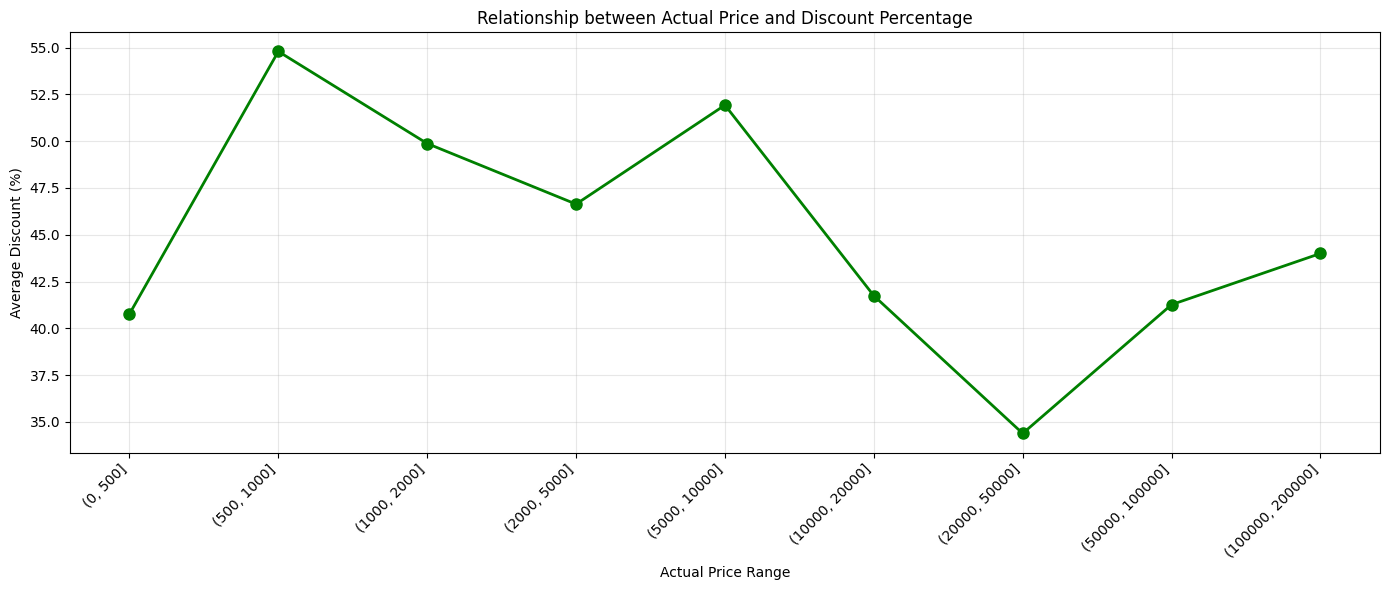

In [15]:
import matplotlib.pyplot as plt

# Convert discounted_price to numeric
df['discounted_price_numeric'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)

# Group by actual price ranges and calculate average discount percentage
price_bins = [0, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000, 200000]
df['price_range'] = pd.cut(df['actual_price_numeric'], bins=price_bins)

# Calculate average discount for each price range
price_discount = df.groupby('price_range')['discount_percentage'].apply(lambda x: x.str.replace('%', '').astype(float).mean())

# Create line graph
plt.figure(figsize=(14, 6))
plt.plot(range(len(price_discount)), price_discount.values, marker='o', linewidth=2, markersize=8, color='green')
plt.xlabel('Actual Price Range')
plt.ylabel('Average Discount (%)')
plt.title('Relationship between Actual Price and Discount Percentage')
plt.xticks(range(len(price_discount)), [str(interval) for interval in price_discount.index], rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


OptimalDiscount(type, actualPrice) =
0.5*(1 - DemandScore(type))+
0.3*(1 - QualityScore(type))+
0.2*(actualPrice / (actualPrice + 5000))
=============
PriceFactor = actualPrice / (actualPrice + 5000)
Examples:
₹500 → 500/(5500)= 0.09
₹5000 → 5000/(10000)= 0.5
₹20000 → 20000/(25000)= 0.8

DemandScore(type) = sales(type) / max_sales

Type	                 Sales	    Demand Score
Electronics	            15,778,848	1.00 (highest)
Computers & Accessories	7,728,689	0.49
Home & Kitchen	        2,991,069	0.19
Office Products	        149,675	    0.009
QualityScore(type) = rating(type) / max_rating

Type	                 Rating	        Quality Score
OfficeProducts	             4.309677	1.00
Computers&Accessories	    4.154967	0.71
Electronics	                4.081749	0.59
Home&Kitchen	            4.040716	0.52

Higher demand → Lower discount needed
Higher rating → Lower discount needed
Higher actual price → Higher discount expected

So overall:

OptimalDiscount = A*(1 - DemandScore) + B*(1 - QualityScore) + C*PriceFactor

Where:

A = weight for demand (recommended 0.5)
B = weight for rating (recommended 0.3)
C = weight for price (recommended 0.2)



In [16]:
# Step 1: Calculate total sales and average rating for each type
type_stats = df.groupby('type').agg({
    'Sales': 'sum',
    'rating': 'mean'
}).reset_index()

type_stats.columns = ['type', 'total_sales', 'avg_rating']

print("Type Statistics:")
print(type_stats)
print("\n" + "="*50 + "\n")

Type Statistics:
                    type  total_sales  avg_rating
0  Computers&Accessories      7728689    4.154967
1            Electronics     15778848    4.081749
2           Home&Kitchen      2991069    4.040716
3         OfficeProducts       149675    4.309677




In [17]:
# Step 2: Calculate DemandScore and QualityScore
max_sales = type_stats['total_sales'].max()
max_rating = type_stats['avg_rating'].max()

type_stats['DemandScore'] = type_stats['total_sales'] / max_sales
type_stats['QualityScore'] = type_stats['avg_rating'] / max_rating

print("Scores by Type:")
print(type_stats[['type', 'DemandScore', 'QualityScore']])
print("\n" + "="*50 + "\n")

Scores by Type:
                    type  DemandScore  QualityScore
0  Computers&Accessories     0.489813      0.964102
1            Electronics     1.000000      0.947112
2           Home&Kitchen     0.189562      0.937591
3         OfficeProducts     0.009486      1.000000




In [18]:
# Step 3: Merge scores back to main dataframe
df = df.merge(type_stats[['type', 'DemandScore', 'QualityScore']], on='type', how='left')

# Step 4: Calculate PriceFactor
df['PriceFactor'] = df['actual_price_numeric'] / (df['actual_price_numeric'] + 5000)

# Display sample
print("Sample rows with calculated factors:")
print(df[['type', 'actual_price_numeric', 'DemandScore', 'QualityScore', 'PriceFactor']].head())
print("\n" + "="*50 + "\n")

Sample rows with calculated factors:
                    type  actual_price_numeric  DemandScore  QualityScore  \
0  Computers&Accessories                1099.0     0.489813      0.964102   
1  Computers&Accessories                 349.0     0.489813      0.964102   
2  Computers&Accessories                1899.0     0.489813      0.964102   
3  Computers&Accessories                 699.0     0.489813      0.964102   
4  Computers&Accessories                 399.0     0.489813      0.964102   

   PriceFactor  
0     0.180193  
1     0.065246  
2     0.275257  
3     0.122653  
4     0.073903  




In [19]:
# Step 5: Calculate Optimal Discount using the formula
# OptimalDiscount = 0.5*(1 - DemandScore) + 0.3*(1 - QualityScore) + 0.2*PriceFactor

A = 0.5  # weight for demand
B = 0.3  # weight for quality/rating
C = 0.2  # weight for price

df['OptimalDiscount'] = (
    A * (1 - df['DemandScore']) +
    B * (1 - df['QualityScore']) +
    C * df['PriceFactor']
)

# Convert to percentage (multiply by 100)
df['OptimalDiscount_Percent'] = df['OptimalDiscount'] * 100

# Also convert actual discount_percentage to numeric for comparison
df['actual_discount_numeric'] = df['discount_percentage'].str.replace('%', '').astype(float)

print("Optimal Discount Model Results:")
print(df[['type', 'actual_price_numeric', 'actual_discount_numeric', 'OptimalDiscount_Percent']].head(10))
print("\n" + "="*50 + "\n")

Optimal Discount Model Results:
                    type  actual_price_numeric  actual_discount_numeric  \
0  Computers&Accessories                1099.0                     64.0   
1  Computers&Accessories                 349.0                     43.0   
2  Computers&Accessories                1899.0                     90.0   
3  Computers&Accessories                 699.0                     53.0   
4  Computers&Accessories                 399.0                     61.0   
5  Computers&Accessories                1000.0                     85.0   
6  Computers&Accessories                 499.0                     65.0   
7  Computers&Accessories                 299.0                     23.0   
8  Computers&Accessories                 999.0                     50.0   
9  Computers&Accessories                 299.0                     33.0   

   OptimalDiscount_Percent  
0                30.190158  
1                27.891206  
2                32.091435  
3                29.039351

In [20]:
# Step 6: Compare Actual vs Optimal Discount
df['Discount_Difference'] = df['actual_discount_numeric'] - df['OptimalDiscount_Percent']

# Summary statistics
print("Model Performance Summary:")
print(f"Average Actual Discount: {df['actual_discount_numeric'].mean():.2f}%")
print(f"Average Optimal Discount: {df['OptimalDiscount_Percent'].mean():.2f}%")
print(f"Average Difference: {df['Discount_Difference'].mean():.2f}%")
print(f"Median Difference: {df['Discount_Difference'].median():.2f}%")
print("\n" + "="*50 + "\n")

# Show examples by type
print("Average Discounts by Type:")
comparison = df.groupby('type').agg({
    'actual_discount_numeric': 'mean',
    'OptimalDiscount_Percent': 'mean',
    'Discount_Difference': 'mean'
}).round(2)
comparison.columns = ['Actual Avg Discount (%)', 'Optimal Avg Discount (%)', 'Difference (%)']
print(comparison)

Model Performance Summary:
Average Actual Discount: 47.71%
Average Optimal Discount: 29.48%
Average Difference: 18.24%
Median Difference: 16.73%


Average Discounts by Type:
                       Actual Avg Discount (%)  Optimal Avg Discount (%)  \
type                                                                       
Computers&Accessories                    54.02                     30.53   
Electronics                              50.83                     10.50   
Home&Kitchen                             40.12                     49.22   
OfficeProducts                           12.35                     50.86   

                       Difference (%)  
type                                   
Computers&Accessories           23.50  
Electronics                     40.33  
Home&Kitchen                    -9.09  
OfficeProducts                 -38.50  


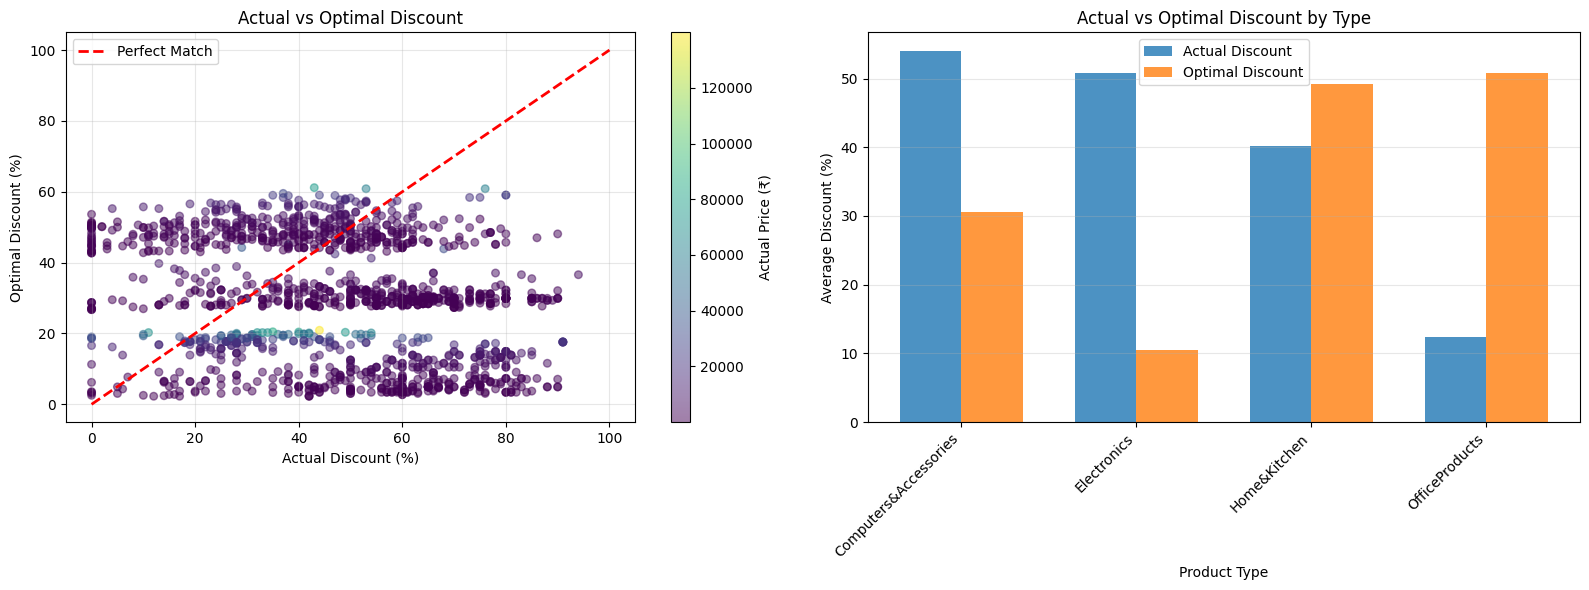

In [21]:
# Step 7: Visualize Actual vs Optimal Discount
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Scatter plot - Actual vs Optimal
axes[0].scatter(df['actual_discount_numeric'], df['OptimalDiscount_Percent'], 
                alpha=0.5, s=30, c=df['actual_price_numeric'], cmap='viridis')
axes[0].plot([0, 100], [0, 100], 'r--', linewidth=2, label='Perfect Match')
axes[0].set_xlabel('Actual Discount (%)')
axes[0].set_ylabel('Optimal Discount (%)')
axes[0].set_title('Actual vs Optimal Discount')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
cbar = plt.colorbar(axes[0].collections[0], ax=axes[0])
cbar.set_label('Actual Price (₹)')

# Plot 2: Comparison by Type
comparison_plot = df.groupby('type').agg({
    'actual_discount_numeric': 'mean',
    'OptimalDiscount_Percent': 'mean'
}).round(2)

x = range(len(comparison_plot))
width = 0.35
axes[1].bar([i - width/2 for i in x], comparison_plot['actual_discount_numeric'], 
            width, label='Actual Discount', alpha=0.8)
axes[1].bar([i + width/2 for i in x], comparison_plot['OptimalDiscount_Percent'], 
            width, label='Optimal Discount', alpha=0.8)
axes[1].set_xlabel('Product Type')
axes[1].set_ylabel('Average Discount (%)')
axes[1].set_title('Actual vs Optimal Discount by Type')
axes[1].set_xticks(x)
axes[1].set_xticklabels(comparison_plot.index, rotation=45, ha='right')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

In [22]:
df.sample(5)

,discounted_price,actual_price,discount_percentage,rating,Sales,type,discount_bin,actual_price_numeric,discounted_price_numeric,price_range,DemandScore,QualityScore,PriceFactor,OptimalDiscount,OptimalDiscount_Percent,actual_discount_numeric,Discount_Difference
816,"₹4,449","₹5,734",22%,4.4,25006,Computers&Accessories,20,5734.0,4449.0,"(5000, 10000]",0.489813,0.964102,0.534190,0.372701,37.270097,22.0,-15.270097
982,₹598,"₹1,150",48%,4.1,2535,Computers&Accessories,40,1150.0,598.0,"(1000, 2000]",0.489813,0.964102,0.186992,0.303261,30.326126,48.0,17.673874
439,"₹7,499","₹7,999",6%,4.0,30907,Electronics,0,7999.0,7499.0,"(5000, 10000]",1.000000,0.947112,0.615355,0.138937,13.893728,6.0,-7.893728
226,₹209,₹499,58%,4.0,479,Electronics,50,499.0,209.0,"(0, 500]",1.000000,0.947112,0.090744,0.034015,3.401503,58.0,54.598497
1291,₹475,₹999,52%,4.1,1021,Home&Kitchen,50,999.0,475.0,"(500, 1000]",0.189562,0.937591,0.166528,0.457247,45.724720,52.0,6.275280


In [23]:
# Create a Discount Prediction Model
# Store the type statistics for prediction
model_data = type_stats[['type', 'DemandScore', 'QualityScore']].copy()

def predict_optimal_discount(product_type, actual_price):
    """
    Predict optimal discount based on product type and actual price
    
    Parameters:
    - product_type: str (e.g., 'Electronics', 'Computers&Accessories', etc.)
    - actual_price: float or int (price in rupees)
    
    Returns:
    - optimal_discount_percent: float (recommended discount percentage)
    """
    # Weights
    A = 0.5  # weight for demand
    B = 0.3  # weight for quality/rating
    C = 0.2  # weight for price
    
    # Get scores for the product type
    type_scores = model_data[model_data['type'] == product_type]
    
    if type_scores.empty:
        print(f"Warning: Type '{product_type}' not found in training data.")
        print(f"Available types: {model_data['type'].tolist()}")
        return None
    
    demand_score = type_scores['DemandScore'].values[0]
    quality_score = type_scores['QualityScore'].values[0]
    
    # Calculate PriceFactor
    price_factor = actual_price / (actual_price + 5000)
    
    # Calculate OptimalDiscount
    optimal_discount = (
        A * (1 - demand_score) +
        B * (1 - quality_score) +
        C * price_factor
    )
    
    # Convert to percentage
    optimal_discount_percent = optimal_discount * 100
    
    return round(optimal_discount_percent, 2)

# Test the function
print("=== Discount Prediction Model ===\n")
print("Testing the model with examples:\n")

test_cases = [
    ('Electronics', 500),
    ('Electronics', 5000),
    ('Electronics', 20000),
    ('Computers&Accessories', 10000),
    ('Home&Kitchen', 3000),
    ('OfficeProducts', 1500)
]

for product_type, price in test_cases:
    discount = predict_optimal_discount(product_type, price)
    if discount:
        print(f"Type: {product_type:25s} | Price: ₹{price:,} | Optimal Discount: {discount}%")

=== Discount Prediction Model ===

Testing the model with examples:

Type: Electronics               | Price: ₹500 | Optimal Discount: 3.4%
Type: Electronics               | Price: ₹5,000 | Optimal Discount: 11.59%
Type: Electronics               | Price: ₹20,000 | Optimal Discount: 17.59%
Type: Computers&Accessories     | Price: ₹10,000 | Optimal Discount: 39.92%
Type: Home&Kitchen              | Price: ₹3,000 | Optimal Discount: 49.89%
Type: OfficeProducts            | Price: ₹1,500 | Optimal Discount: 54.14%


In [24]:
# Interactive prediction function
def get_discount_recommendation():
    """
    Interactive function to get discount recommendations
    """
    print("\n" + "="*60)
    print("DISCOUNT RECOMMENDATION SYSTEM")
    print("="*60)
    print(f"\nAvailable Product Types: {', '.join(model_data['type'].tolist())}")
    
    product_type = input("\nEnter Product Type: ")
    try:
        actual_price = float(input("Enter Actual Price (₹): "))
        
        discount = predict_optimal_discount(product_type, actual_price)
        
        if discount:
            print("\n" + "-"*60)
            print(f"RECOMMENDATION:")
            print(f"Product Type: {product_type}")
            print(f"Actual Price: ₹{actual_price:,.2f}")
            print(f"Optimal Discount: {discount}%")
            print(f"Discounted Price: ₹{actual_price * (1 - discount/100):,.2f}")
            print("-"*60)
    except ValueError:
        print("Error: Please enter a valid price number")

# Uncomment the line below to use the interactive function
# get_discount_recommendation()

In [25]:
# Clean up the dataframe - keep only essential columns
df_clean = df[['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'Sales', 'type', 'OptimalDiscount_Percent']].copy()

# Rename for clarity
df_clean.columns = ['Discounted_Price', 'Actual_Price', 'Current_Discount', 'Rating', 'Sales', 'Type', 'Optimal_Discount']

print("Cleaned DataFrame with Optimal Discount:")
print(f"Shape: {df_clean.shape}")
print("\nFirst 10 rows:")
print(df_clean.head(10))
print("\nDataFrame Info:")
print(df_clean.info())

Cleaned DataFrame with Optimal Discount:
Shape: (1458, 7)

First 10 rows:
  Discounted_Price Actual_Price Current_Discount  Rating   Sales  \
0             ₹399       ₹1,099              64%     4.2   24269   
1             ₹199         ₹349              43%     4.0   43994   
2             ₹199       ₹1,899              90%     3.9    7928   
3             ₹329         ₹699              53%     4.2   94363   
4             ₹154         ₹399              61%     4.2   16905   
5             ₹149       ₹1,000              85%     3.9   24871   
6          ₹176.63         ₹499              65%     4.1   15188   
7             ₹229         ₹299              23%     4.3   30411   
8             ₹499         ₹999              50%     4.2  179691   
9             ₹199         ₹299              33%     4.0   43994   

                    Type  Optimal_Discount  
0  Computers&Accessories         30.190158  
1  Computers&Accessories         27.891206  
2  Computers&Accessories         32.091435

In [26]:
# Save the cleaned dataframe and model data
df_clean.to_csv('amazon_with_optimal_discount.csv', index=False)
model_data.to_csv('discount_model_data.csv', index=False)

print("Files saved successfully!")
print("1. amazon_with_optimal_discount.csv - Main dataset with optimal discount predictions")
print("2. discount_model_data.csv - Model data for making new predictions")
print("\nYou can now use the predict_optimal_discount() function to predict discounts for any product!")

Files saved successfully!
1. amazon_with_optimal_discount.csv - Main dataset with optimal discount predictions
2. discount_model_data.csv - Model data for making new predictions

You can now use the predict_optimal_discount() function to predict discounts for any product!


In [27]:
import pickle

# Save the model data (type statistics with scores) as pickle
with open('discount_model.pkl', 'wb') as f:
    pickle.dump(model_data, f)

print("✓ Model saved as 'discount_model.pkl'")
print(f"  Model contains data for {len(model_data)} product types")
print(f"  Types: {', '.join(model_data['type'].tolist())}")

✓ Model saved as 'discount_model.pkl'
  Model contains data for 4 product types
  Types: Computers&Accessories, Electronics, Home&Kitchen, OfficeProducts
